In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# Read CSV File and Add Totals Column 
population_stats = pd.read_csv('ProvincePopulation.csv').sort_values('Population',ascending=False)
crime_stats = pd.read_csv('SouthAfricaCrimeStats_v2.csv')
crime_stats['Total 2005-2016'] = crime_stats.sum(axis=1)
crime_stats.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889


In [5]:
# Group Crime Counts by Province
crimes_by_province = crime_stats.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']

<ipython-input-5-1c352cc8d745>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crimes_by_province = crime_stats.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',


In [6]:
# Group Crime Counts by Category
crimes_by_category = crime_stats.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']

<ipython-input-6-bf421696dbf6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crimes_by_category = crime_stats.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',


In [7]:
# Group Crime Counts by Station
crimes_by_station = crime_stats.groupby(['Station'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']

<ipython-input-7-49e6931c9a9d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crimes_by_station = crime_stats.groupby(['Station'])['2005-2006','2006-2007','2007-2008','2008-2009',


In [8]:
#Add counts, Reset Index & Sort by Total Crimes Between 2005-2016
province_totals = crimes_by_province.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
category_totals = crimes_by_category.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
station_totals = crimes_by_station.sum().reset_index().sort_values('Total 2005-2016',ascending=False)

In [9]:
# Create Total Stations by Province Dataframe
total_province_stations = pd.DataFrame(crime_stats['Province'].value_counts()).reset_index()
total_province_stations['Total Stations'] = total_province_stations['Province']
total_province_stations.drop('Province',axis=1,inplace=True)
total_province_stations['Province'] = total_province_stations['index']
total_province_stations.drop('index',axis=1,inplace=True)

In [10]:
# Create All Province Totals Dataframe (Crime + Population Data)

# Set Index To Province (To add totals)
province_totals.set_index('Province',inplace=True)
total_province_stations.set_index('Province',inplace=True)
population_stats.set_index('Province',inplace=True)


In [11]:
# Add Totals to province_totals Dataframe
province_totals['Total Stations'] = total_province_stations['Total Stations']
province_totals['Population'] = population_stats['Population']
province_totals['Area'] = population_stats['Area']
province_totals['Density'] = population_stats['Density']

In [12]:
# Reset index back
province_totals = province_totals.reset_index()
total_province_stations = total_province_stations.reset_index()
population_stats = population_stats.reset_index()

Text(0.5, 0, 'South African Provinces')

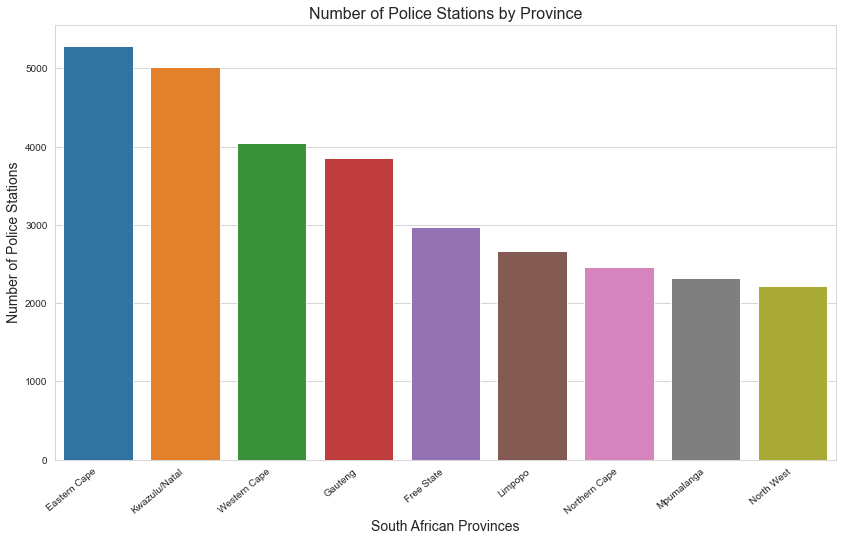

In [13]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=total_province_stations,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'South African Provinces')

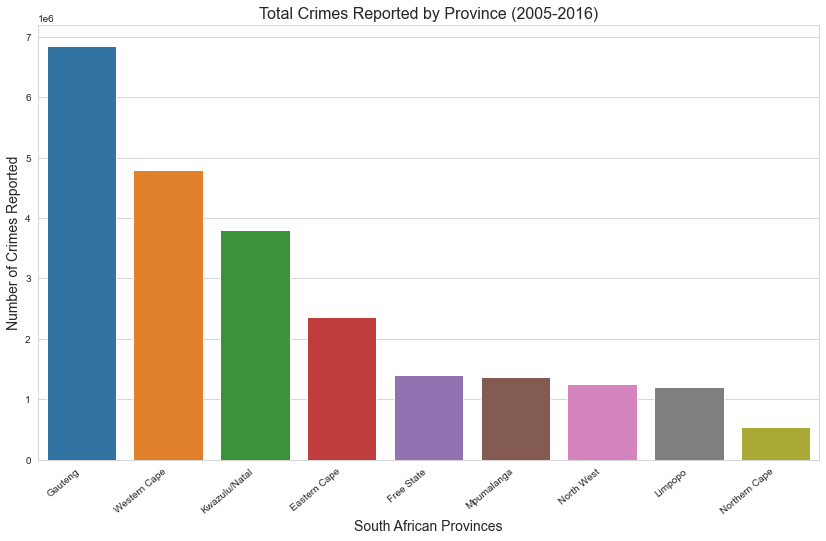

In [14]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=province_totals,x='Province',y='Total 2005-2016')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'Number of Crimes Reported')

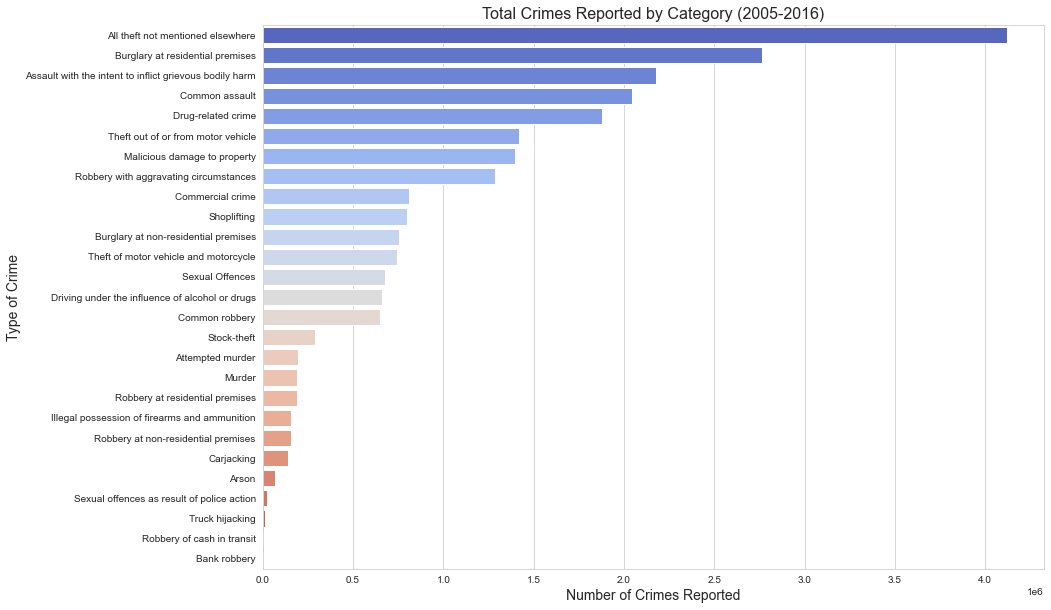

In [15]:
# Plot Figure
plt.figure(figsize=(14,10)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=category_totals,y='Category',x='Total 2005-2016',palette='coolwarm')
ax.set_title('Total Crimes Reported by Category (2005-2016)',fontsize=16)
ax.set_ylabel('Type of Crime',fontsize=14)
ax.set_xlabel('Number of Crimes Reported',fontsize=14)

Text(0.5, 0, 'South African Police Stations')

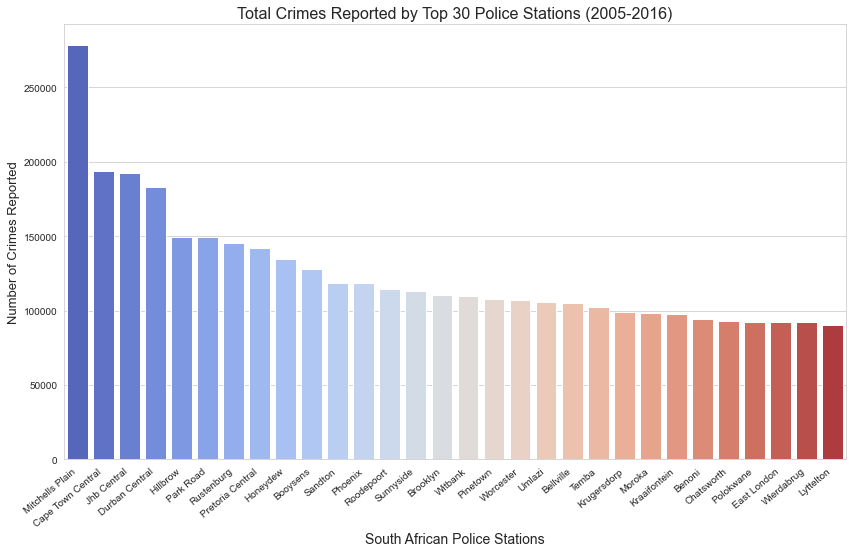

In [16]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.head(30),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Top 30 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

<ipython-input-17-0862e4cf30e0>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:title={'center':'Correlation Heatmap'}>

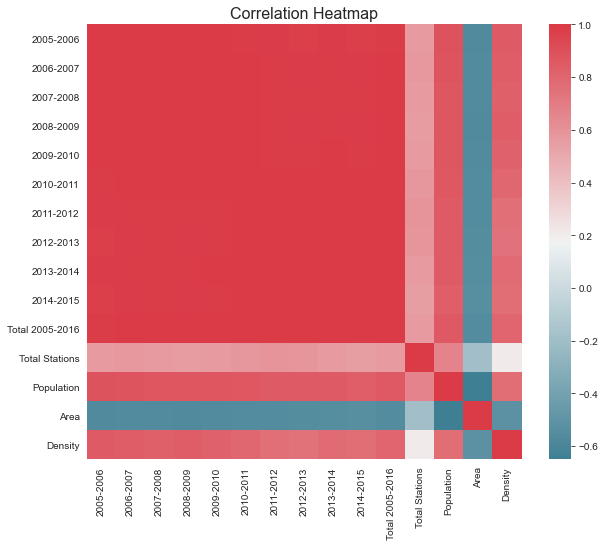

In [17]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Heatmap',fontsize=16)
corr = province_totals.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [18]:
# From the above Correlation Heatmap, there is clearly a strong positive correlation between the total amount of crimes committed compared to the population and density of a Province. 
# There is also a positive correlation between the total number of police stations in a province compared to the total amount of crimes. 
#This does not mean that there is higher crime because there are more police stations but perhaps there are more stations to combat the higher amount of crime. 
# It can also be observed that there is a negative correlation between the area size of a province compared to the number of crimes committed. 
# All this can be further illustrated with a Correlation Gradient below:

In [19]:
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016,Total Stations,Population,Area,Density
2005-2006,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.98,0.98,0.98,0.99,0.57,0.89,-0.57,0.86
2006-2007,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.99,0.99,1.00,0.57,0.88,-0.57,0.84
2007-2008,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.57,0.83
2008-2009,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.56,0.88,-0.57,0.84
2009-2010,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.56,0.82
2010-2011,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.58,0.86,-0.56,0.80
2011-2012,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.60,0.86,-0.55,0.76
2012-2013,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.59,0.85,-0.55,0.74
2013-2014,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.57,0.85,-0.54,0.78
2014-2015,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.55,0.83,-0.54,0.77
